In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [4]:
train_df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
test_df.patient_state.value_counts()

CA    1047
TX     494
NY     471
IL     355
MI     337
OH     308
FL     282
GA     261
PA     231
VA     175
MN     172
CO     166
IN     150
KY     131
AZ     121
WI     100
NC      99
WA      87
OK      71
LA      70
NM      65
MO      65
SC      57
ID      51
TN      48
AR      34
IA      34
OR      34
MS      33
MD      28
MT      25
NV      25
NE      24
AL      23
KS      20
WV      18
HI      13
UT      12
DC       8
DE       8
NJ       7
SD       3
ND       3
WY       3
MA       1
AK       1
Name: patient_state, dtype: int64

In [7]:
train_df.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

In [8]:
test_df.isnull().sum()

patient_id             0
patient_race        2901
payer_type           760
patient_state         21
patient_zip3           0
                    ... 
health_uninsured       0
veteran                0
Ozone                 14
PM25                  14
N02                   14
Length: 82, dtype: int64

In [9]:
train_df.patient_race.value_counts()

White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: patient_race, dtype: int64

In [10]:
train_df['patient_race'].fillna('not_given', inplace=True)
test_df['patient_race'].fillna('not_given', inplace=True)

In [11]:
train_df['payer_type'].value_counts()

COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: payer_type, dtype: int64

In [12]:
train_df['payer_type'].fillna('none_given', inplace=True)
test_df['payer_type'].fillna('none_given', inplace=True)

train_df['Region'].fillna('none_given', inplace=True)
test_df['Region'].fillna('none_given', inplace=True)

train_df['Division'].fillna('none_given', inplace=True)
test_df['Division'].fillna('none_given', inplace=True)

In [13]:
train_df['patient_state'].value_counts()

CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: patient_state, dtype: int64

In [14]:
max_state = train_df['patient_state'].mode()[0]
train_df['patient_state'].fillna(max_state, inplace=True)

max_state = test_df['patient_state'].mode()[0]
test_df['patient_state'].fillna(max_state, inplace=True)

In [15]:
median_bmi = train_df['bmi'].median()
train_df['bmi'].fillna(median_bmi, inplace=True)

median_bmi = test_df['bmi'].median()
test_df['bmi'].fillna(median_bmi, inplace=True)

In [16]:
medians = train_df.median()
train_df.fillna(medians, inplace=True)

medians = train_df.median()
test_df.fillna(medians, inplace=True)

/tmp/ipykernel_7640/1211048938.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = train_df.median()
/tmp/ipykernel_7640/1211048938.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = train_df.median()


In [17]:
train_df['metastatic_first_novel_treatment'].value_counts()

PEMBROLIZUMAB    13
OLAPARIB         11
Name: metastatic_first_novel_treatment, dtype: int64

In [18]:
train_df['metastatic_first_novel_treatment_type'].value_counts()

Antineoplastics    24
Name: metastatic_first_novel_treatment_type, dtype: int64

In [19]:
train_df['DiagPeriodL90D'].value_counts()

1    8060
0    4846
Name: DiagPeriodL90D, dtype: int64

In [20]:
train_df.drop(columns=['patient_gender'], inplace=True)
test_df.drop(columns=['patient_gender'], inplace=True)

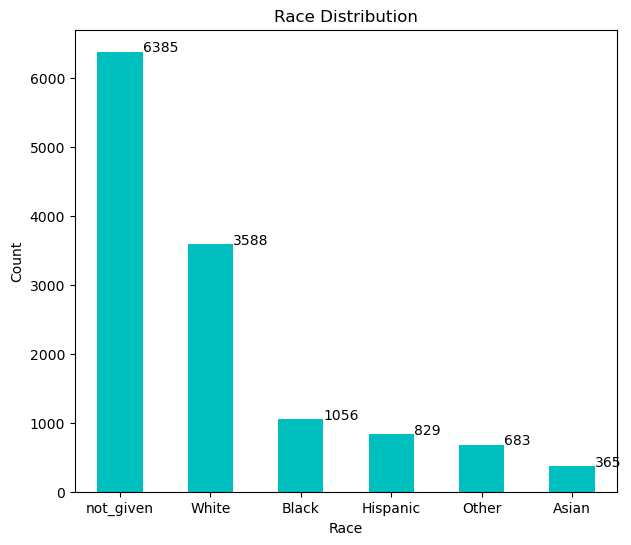

In [21]:
race = train_df['patient_race'].value_counts()
plt.figure(figsize=(7, 6))
ax = race.plot(kind='bar', rot=0, color='c')
ax.set_title('Race Distribution')
ax.set_xlabel('Race')
ax.set_ylabel('Count')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value))
    
plt.show()

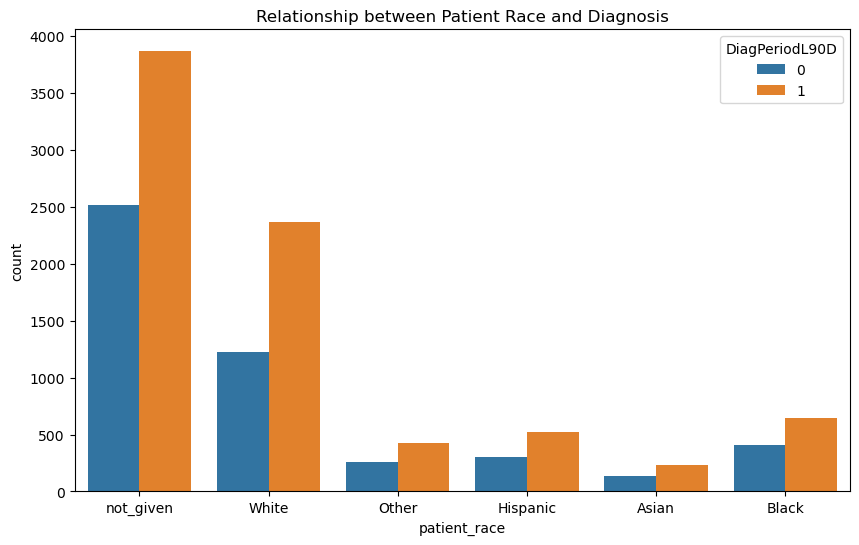

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='patient_race', hue='DiagPeriodL90D', data=train_df)
plt.title('Relationship between Patient Race and Diagnosis')
plt.show()

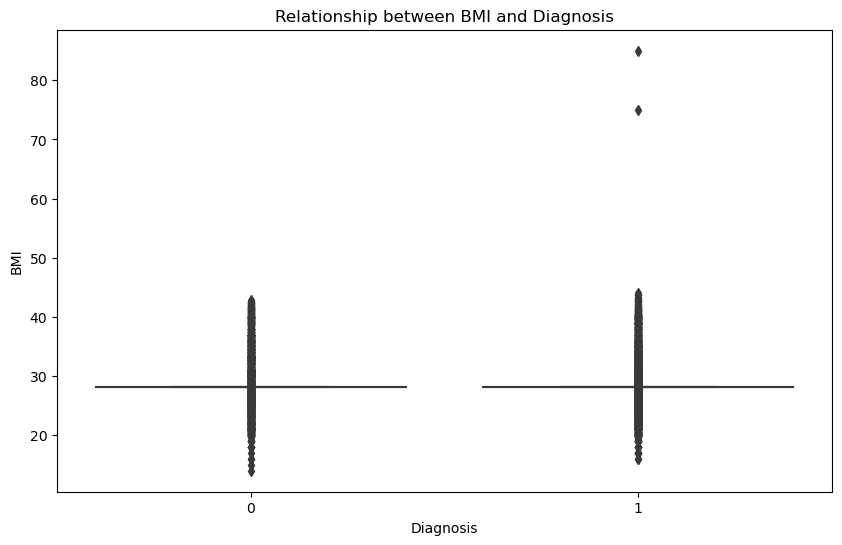

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DiagPeriodL90D', y='bmi', data=train_df, palette='viridis')
plt.title('Relationship between BMI and Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('BMI')
plt.show()

In [24]:
train_df.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 82, dtype: object

In [25]:
train_df['metastatic_first_novel_treatment_type'].value_counts()

Antineoplastics    24
Name: metastatic_first_novel_treatment_type, dtype: int64

In [26]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [27]:
train_df['breast_cancer_diagnosis_desc'] = train_df['breast_cancer_diagnosis_desc'].apply(lambda x: nlp(x).vector)

In [28]:
test_df['breast_cancer_diagnosis_desc'] = test_df['breast_cancer_diagnosis_desc'].apply(lambda x: nlp(x).vector)

In [29]:
train_df['breast_cancer_diagnosis_desc']

0        [-2.1857245, -1.499248, -0.06484781, 0.8663789...
1        [-3.1930542, 0.059765514, -1.285679, 3.0578089...
2        [-3.2976353, -0.5322255, -1.5312644, 1.9199702...
3        [-2.7909133, 0.33778822, -1.4030054, 3.0241168...
4        [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
                               ...                        
12901    [-3.1930542, 0.059765514, -1.285679, 3.0578089...
12902    [-1.9969578, -0.90365875, -0.08969781, 1.02054...
12903    [-1.9969578, -0.90365875, -0.08969781, 1.02054...
12904    [-3.7947798, -2.8656478, 2.047403, 1.2504234, ...
12905    [-3.1247225, 0.27641553, -1.0901781, 3.0718443...
Name: breast_cancer_diagnosis_desc, Length: 12906, dtype: object

In [30]:
# train_df.drop(columns=['breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)
# test_df.drop(columns=['breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)

In [31]:
train_df.drop(columns=['breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)
test_df.drop(columns=['breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_zip3'], inplace=True)

In [32]:
train_df['Division'].value_counts()

East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
none_given              52
New England              5
Name: Division, dtype: int64

In [33]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['patient_race'], prefix='patient_race')], axis=1)
train_df.drop(columns=['patient_race'], inplace=True)

In [34]:
test_df = pd.concat([test_df, pd.get_dummies(test_df['patient_race'], prefix='patient_race')], axis=1)
test_df.drop(columns=['patient_race'], inplace=True)

In [35]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['payer_type'], prefix='payer_type')], axis=1)
train_df.drop(columns=['payer_type'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['payer_type'], prefix='payer_type')], axis=1)
test_df.drop(columns=['payer_type'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['patient_state'], prefix='patient_state')], axis=1)
train_df.drop(columns=['patient_state'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['patient_state'], prefix='patient_state')], axis=1)
test_df.drop(columns=['patient_state'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['Division'], prefix='Division')], axis=1)
train_df.drop(columns=['Division'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Division'], prefix='Division')], axis=1)
test_df.drop(columns=['Division'], inplace=True)

train_df = pd.concat([train_df, pd.get_dummies(train_df['Region'], prefix='Region')], axis=1)
train_df.drop(columns=['Region'], inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Region'], prefix='Region')], axis=1)
test_df.drop(columns=['Region'], inplace=True)

In [36]:
train_df = train_df.drop(columns=['patient_state_CT', 'patient_state_NH', 'patient_state_PR', 'patient_state_RI'])

In [37]:
train_df['breast_cancer_diagnosis_desc'] = np.stack(train_df['breast_cancer_diagnosis_desc'])
test_df['breast_cancer_diagnosis_desc'] = np.stack(test_df['breast_cancer_diagnosis_desc'])

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_desc = np.vstack(train_df['breast_cancer_diagnosis_desc'])

# Fit and transform the scaler on the reshaped data
train_df['breast_cancer_diagnosis_desc'] = scaler.fit_transform(X_train_desc)

# Now, similarly transform the test data
# Assuming test_df is your test DataFrame
X_test_desc = np.vstack(test_df['breast_cancer_diagnosis_desc'])
test_df['breast_cancer_diagnosis_desc'] = scaler.transform(X_test_desc)

In [39]:
y = train_df['DiagPeriodL90D']
X = train_df.drop(columns =['DiagPeriodL90D'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [40]:
X_test_patient_id = X_test['patient_id']
X_train.drop(columns=['patient_id'], inplace=True)
X_test.drop(columns=['patient_id'], inplace=True)

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [42]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.70      0.50      1440
           1       0.66      0.34      0.45      2432

    accuracy                           0.47      3872
   macro avg       0.52      0.52      0.47      3872
weighted avg       0.55      0.47      0.47      3872



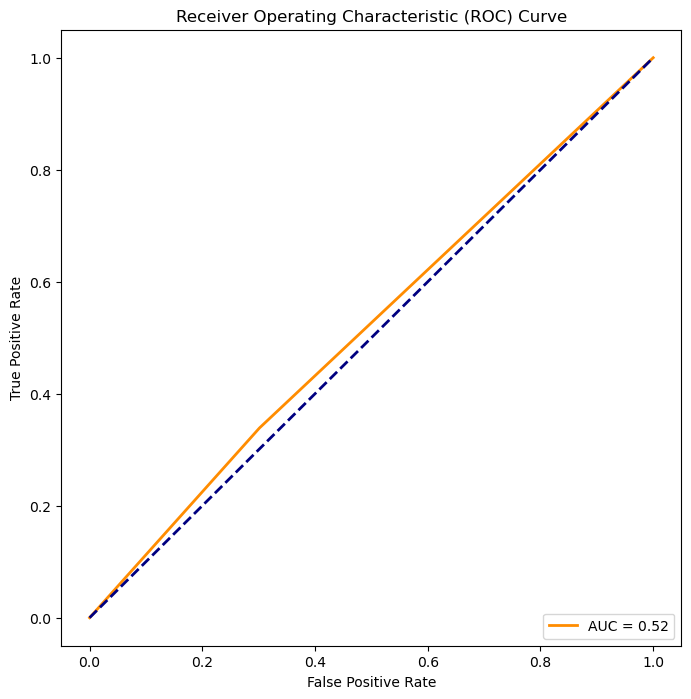

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [54]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.45      0.60      1440
           1       0.75      0.98      0.85      2432

    accuracy                           0.78      3872
   macro avg       0.83      0.71      0.72      3872
weighted avg       0.81      0.78      0.76      3872



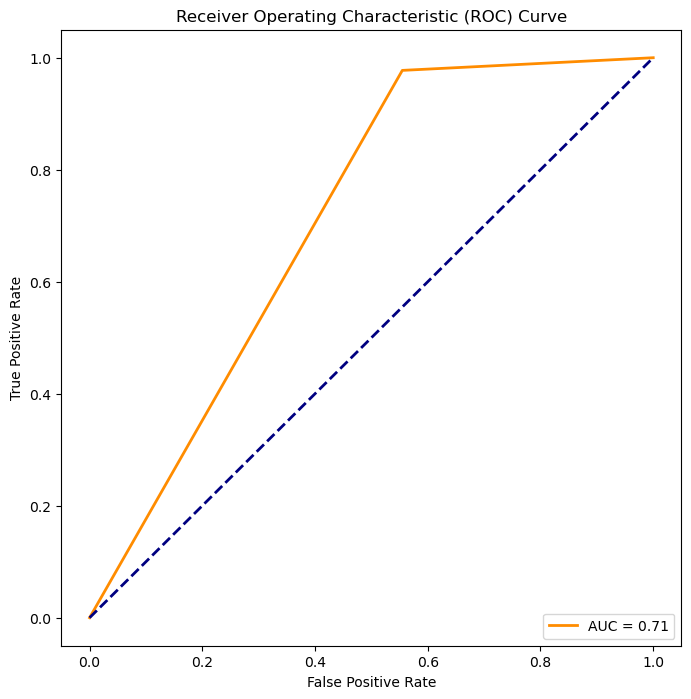

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [57]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.54      0.67      1440
           1       0.78      0.97      0.86      2432

    accuracy                           0.81      3872
   macro avg       0.84      0.75      0.77      3872
weighted avg       0.82      0.81      0.79      3872



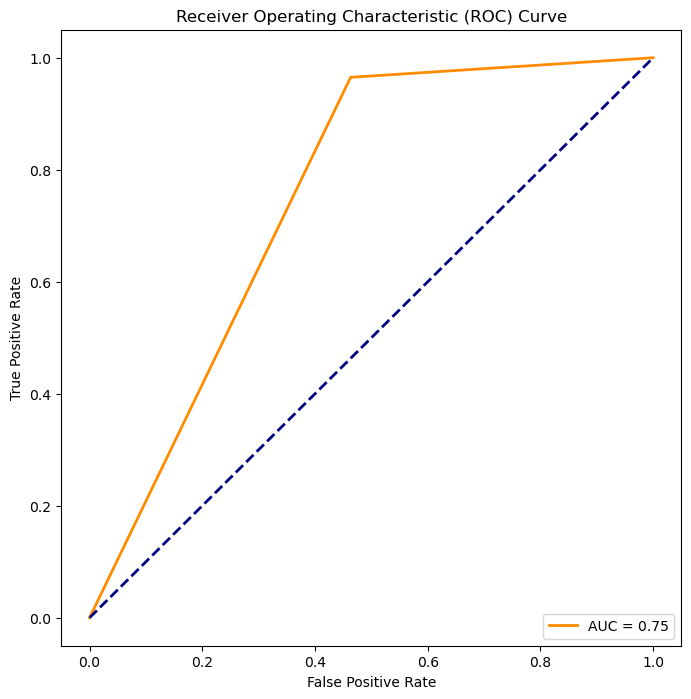

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [72]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [73]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.50      0.64      1440
           1       0.77      0.97      0.86      2432

    accuracy                           0.80      3872
   macro avg       0.84      0.74      0.75      3872
weighted avg       0.82      0.80      0.78      3872



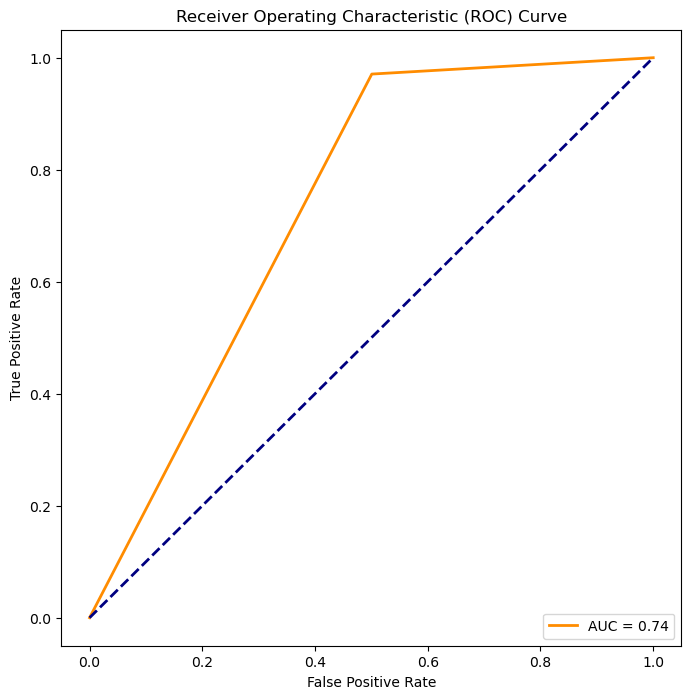

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=200,
                           random_state=0)

In [90]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67      1440
           1       0.78      0.94      0.85      2432

    accuracy                           0.80      3872
   macro avg       0.81      0.75      0.76      3872
weighted avg       0.81      0.80      0.79      3872



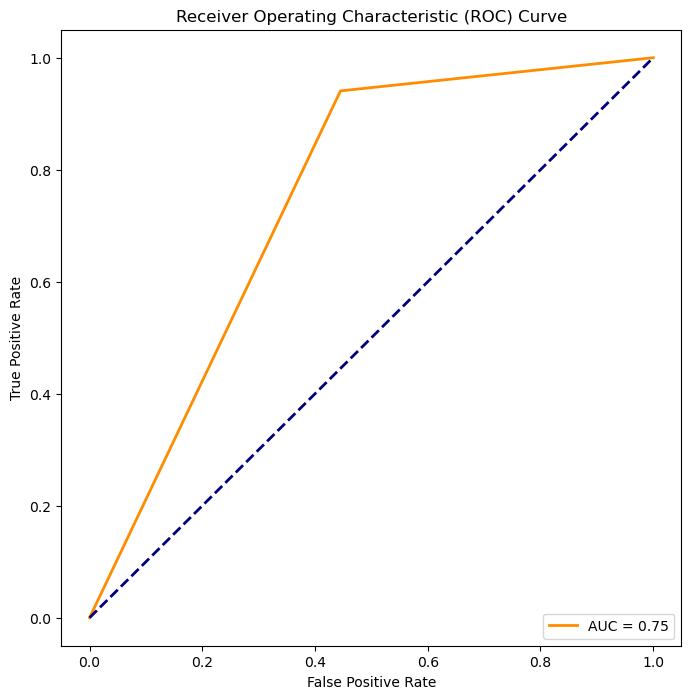

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [113]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(eta=0.1, reg_lambda=1, min_child_weight=4.5)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=4.5, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [114]:
y_pred = xgb_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67      1440
           1       0.78      0.96      0.86      2432

    accuracy                           0.80      3872
   macro avg       0.83      0.75      0.76      3872
weighted avg       0.82      0.80      0.79      3872



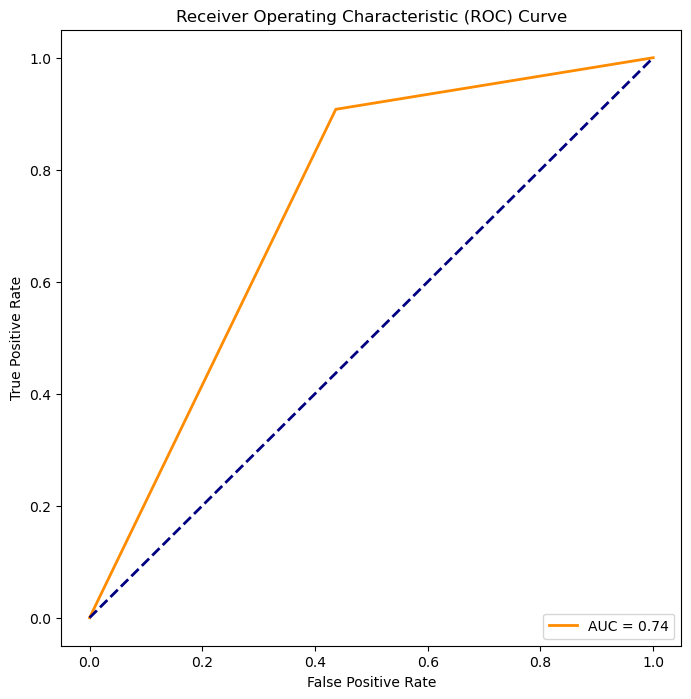

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
test_df

,patient_id,patient_age,bmi,breast_cancer_diagnosis_desc,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,Division_none_given,Region_Midwest,Region_Northeast,Region_South,Region_West,Region_none_given
0,573710,54,28.15,0.331279,5441.435484,85.620968,40.880328,12.732258,14.088710,10.659677,...,0,0,0,0,0,1,0,0,0,0
1,593679,52,28.15,0.799761,19613.820510,1555.107692,49.107692,8.069231,8.587179,10.684615,...,0,1,0,0,0,0,0,1,0,0
2,184532,61,28.15,0.917013,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,...,1,0,0,0,0,0,0,0,1,0
3,447383,64,28.15,0.799761,43030.500000,2048.578261,38.852174,11.306522,12.897826,14.121739,...,1,0,0,0,0,0,0,0,1,0
4,687972,40,23.00,0.331279,36054.117650,5294.330882,36.653846,9.761538,11.267692,17.233846,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,63,29.60,0.302894,7765.000000,131.040000,40.434783,11.556522,14.021739,13.208696,...,0,0,0,0,0,0,0,1,0,0
5788,922960,69,28.15,0.799761,19332.750000,346.250000,38.525000,12.200000,13.025000,14.675000,...,0,0,1,0,0,1,0,0,0,0
5789,759690,84,28.28,0.302894,28628.290910,1091.825455,39.679245,12.143396,12.462264,11.320755,...,1,0,0,0,0,0,0,0,1,0
5790,911717,58,28.15,0.052932,9716.970149,150.602985,39.588060,11.768657,15.576119,12.500000,...,0,0,0,1,0,0,0,1,0,0


In [93]:
test_patient_id = test_df['patient_id']
test_df.drop(columns=['patient_id'], inplace=True)

In [115]:
test_pred = xgb_classifier.predict(test_df)

In [116]:
test_pred

array([1, 1, 1, ..., 1, 0, 1])

In [117]:
test_pred_df = pd.DataFrame(data=test_pred, columns=['DiagPeriodL90D'])
result_df = pd.concat([test_patient_id.reset_index(drop=True), test_pred_df], axis=1)
result_df

,patient_id,DiagPeriodL90D
0,573710,1
1,593679,1
2,184532,1
3,447383,1
4,687972,1
...,...,...
5787,977076,1
5788,922960,1
5789,759690,1
5790,911717,0


In [118]:
result_df.isna().sum()

patient_id        0
DiagPeriodL90D    0
dtype: int64

In [119]:
result_df.to_csv('submission_file3.csv', index=False)